In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

File train.pkl already present, Skipping
File test.pkl already present, Skipping
Loading dataset .. 
(26722, 32, 32) (26722, 2)
[ 2 23]
(6680, 32, 32) (6680, 2)


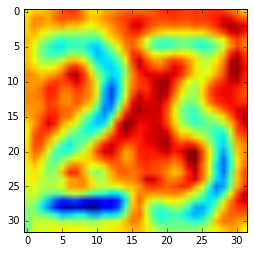

In [8]:
from scipy import ndimage
import numpy as np
from six.moves import cPickle as pickle
import os
import pandas as pd

data_root = "./data"
train_root = os.path.join(data_root, "train")
test_root = os.path.join(data_root, "test")
grayscale_suffix = "grayscale"
pickle_suffix = '.pkl'
image_size = 32
pixel_depth = 255.0

def make_pickle(folder):
	folder_path = os.path.join(data_root, folder)	# ./data/train/
	if not os.path.exists(folder_path):
		raise Exception ("No such folder found : %s"%folder)
	else :
		set_filename = folder+pickle_suffix			# train.pkl
		if os.path.exists(os.path.join(folder_path, set_filename)):	# ./data/train/train.pkl
			print "File %s already present, Skipping"%set_filename
		else : 
			print "Pickling .. "
			csv_data = pd.read_csv(os.path.join(folder_path, folder+".csv"))
			#print csv_data
			num = 0
			dataset = np.ndarray(shape=(csv_data.shape[0], image_size, image_size), dtype=np.float32)
			labels = []
			lengths = []
			for image in csv_data["name"]:
				image_file = os.path.join(folder_path, grayscale_suffix, image)
				image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
				dataset[num, :, :] = image_data
				labels.append(csv_data["label"][num])
				lengths.append(csv_data["length"][num])
				num += 1				
			try:
				with open(os.path.join(folder_path, set_filename), 'wb') as f:
					save = {
					'dataset' : dataset, 
					'labels' : (lengths, labels),
		        	}
					pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
			except Exception as e:
				print 'Unable to save data to', set_filename, ':', e	
		
		return os.path.join(folder_path, set_filename)

# f = make_pickle("test")
# with open(f, 'rb') as file:
# 	save = pickle.load(file)

# print save["dataset"]
# print save["labels"]

def load_data(path=data_root):
	train_file = make_pickle("train")
	test_file = make_pickle("test")
	# train_dataset, train_labels = [], []
	# test_dataset, test_labels = [], []

	print "Loading dataset .. "
	with open(train_file, 'rb') as f:
		save = pickle.load(f)
		train_dataset = np.array(save["dataset"])
		train_labels = np.array(save["labels"]).T

	with open(test_file, 'rb') as f:
		save = pickle.load(f)
		test_dataset = np.array(save["dataset"])
		test_labels = np.array(save["labels"]).T

	# print train_dataset.shape, train_labels.shape
	# print test_dataset.shape, test_labels.shape

	return train_dataset, train_labels, test_dataset, test_labels

train_dataset, train_labels, test_dataset, test_labels = load_data()

# print train_dataset.shape, train_labels.shape
# print test_dataset.shape, test_labels.shape
# print train_labels

def randomize(dataset, labels):
	permutation = np.random.permutation(labels.shape[0])
	shuffled_dataset = dataset[permutation,:,:]
	shuffled_labels = labels[permutation]
	return shuffled_dataset, shuffled_labels

def shuffle_split_data(train_data, train_labels, test_data, test_labels, valid_size=0.2):
    train_dataset, train_labels = randomize(train_data, train_labels)
    test_dataset, test_labels = randomize(test_data, test_labels)

    valid_size = int(train_dataset.shape[0] * valid_size)
    
    train_dataset = train_dataset[:-valid_size, :, :]
    train_labels = train_labels[:-valid_size]
    print train_dataset.shape, train_labels.shape
    print train_labels[0]
    plt.imshow(train_dataset[0])
    
    valid_dataset = train_dataset[-valid_size:, :, :]
    valid_labels = train_labels[-valid_size:]
    print valid_dataset.shape, valid_labels.shape

    return train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels

train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels = \
				shuffle_split_data(train_dataset, train_labels, test_dataset, test_labels)

